In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
from glob import glob
import math
from pprint import pprint
import torch

from tqdm import tqdm
import pygarment as pyg
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time

from tqdm import tqdm

import trimesh
from ANALYSIS.analysis_utils import (
    plot_panel_info,
    visualize_meshes_plotly,
    v_id_map
)

PROJECT_ROOT_PATH = "/media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c757/GarmentCodeData/"
GARMENT_ROOT_PATH = os.path.join(PROJECT_ROOT_PATH, "GarmentCodeData_v2")
BODY_ROOT_PATH = os.path.join(PROJECT_ROOT_PATH, "body_mesh")
MEAN_ALL_BODY_PATH = os.path.join(PROJECT_ROOT_PATH, "neutral_body/mean_all.obj")
    
default_body_mesh = trimesh.load(MEAN_ALL_BODY_PATH)
BODY_TYPE = "default_body"
garment_path_list = sorted(list(filter(
    os.path.isdir,
    glob(os.path.join(GARMENT_ROOT_PATH, "*", BODY_TYPE, "*"))
)))

In [2]:
svg_path_list = []
for garment_path in tqdm(garment_path_list):
    garment_id = os.path.basename(garment_path)

    SPEC_FILE_PATH = os.path.join(garment_path, f"{garment_id}_specification.json")
    pattern = pyg.pattern.wrappers.VisPattern(SPEC_FILE_PATH)

    drawn_pattern_list = list(map(
        lambda pannel_name : pattern._draw_a_panel(
            pannel_name, apply_transform=False, fill=True
        ),
        pattern.panel_order()
    ))
    svg_path_list.extend(list(map(
        lambda x : x[0],
        drawn_pattern_list)
    ))

100%|██████████| 132670/132670 [03:10<00:00, 694.92it/s]


In [3]:
len(svg_path_list)

1470237

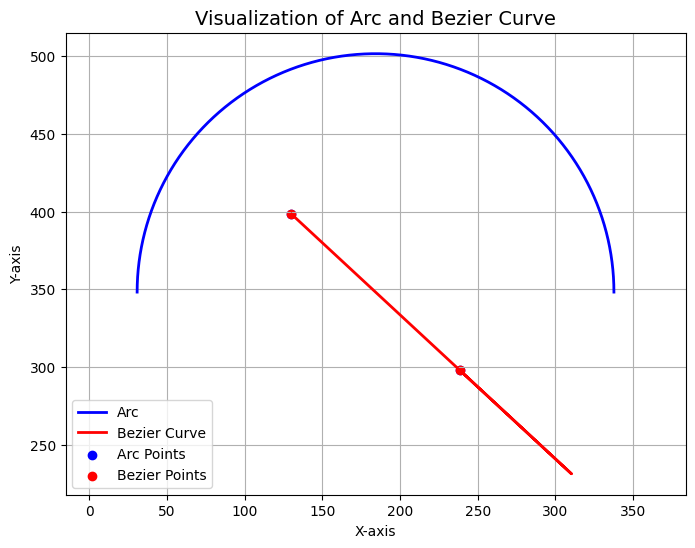

In [8]:
IDX = 0
for edge in svg_path_list[IDX] :
    print(type(edge).__name__)

Line(start=0j, end=(18.117238950508963+0j))
Line
CubicBezier(start=(18.117238950508963+0j), control1=(18.008224307512876+9.975699377309166j), control2=(10.480849152257248+11.974606507809122j), end=(7.091744534163308+18.207114421941466j))
CubicBezier
Line(start=(7.091744534163308+18.207114421941466j), end=18.207114421941466j)
Line
Line(start=18.207114421941466j, end=0j)
Line
